# Homework 1

**Course**: FFR120 - Simulation of Complex Systems

**Author**: Artur Gasparyan

**Assignment**: Homework 1 - Option 4

In [94]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 4.1 

In [95]:
def create_parent_generation(n_cells, rule_nr, rng):
    if rule_nr in (90, 30):
        parent_generation = np.zeros((n_cells,))
        parent_generation[n_cells//2] = 1
        
    else:
        parent_generation = rng.integers(0, 2, size=(n_cells,))
        
    return parent_generation


def create_grid_1d(rule_nr, n_cells, n_generations, rng):
    grid = np.zeros(shape=(n_generations, n_cells), dtype='uint8')
    grid[0, :] = create_parent_generation(n_cells, rule_nr, rng) 
    return grid


def decode_1d_rule(rule_number):
    binary_numbers = [
        (1, 1, 1), (1, 1, 0), (1, 0, 1), (1, 0, 0),
        (0, 1, 1), (0, 1, 0), (0, 0, 1), (0, 0, 0)
    ]

    rule = dict()
    num = rule_number
    for i in range(8):
        num, rem = divmod(num, 2)
        rule[binary_numbers[-i-1]] = rem

    return rule


def update_grid_1d(grid, n_cells, rules, rng):
    grid = np.roll(grid, 1, 0)
    for i in range(1, n_cells-1):
        pattern = grid[1, i-1:i+2]
        grid[0, i] = rules[tuple(pattern)]

    left_pattern = np.zeros(shape=(3,))
    left_pattern[0] = grid[1, -1]
    left_pattern[1:] = grid[1, :2]

    right_pattern = np.zeros(shape=(3,))
    right_pattern[-1] = grid[1, 0]
    right_pattern[:2] = grid[1, -2:]

    grid[0, 0] = rules[tuple(left_pattern)]
    grid[0, -1] = rules[tuple(right_pattern)]

    return grid


In [96]:
a = np.arange(10).reshape(5, 2)
np.roll(a, 1, 0)

array([[8, 9],
       [0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [97]:
decode_1d_rule(90)

{(0, 0, 0): 0,
 (0, 0, 1): 1,
 (0, 1, 0): 0,
 (0, 1, 1): 1,
 (1, 0, 0): 1,
 (1, 0, 1): 0,
 (1, 1, 0): 1,
 (1, 1, 1): 0}

In [98]:
def run_simulation_1d(n_cells, n_generations, rule_nr, rng):
    rules = decode_1d_rule(rule_number=rule_nr)
    grid = create_grid_1d(rule_nr, n_cells, n_generations, rng)
    history = []

    for gen in range(n_generations):
        grid = update_grid_1d(grid, n_cells, rules, rng)
        history.append(grid)

    return history


In [99]:
%matplotlib notebook

import matplotlib.animation as anim


def render_grid(time, history, img):
    img.set_array(history[time])
    return img,


def animate_simulation(history, framerate):
    fig = plt.figure()
    img = plt.imshow(history[0], interpolation='none', animated=True)
    animation = anim.FuncAnimation(fig=fig, func=render_grid, frames=len(history), interval=1000/framerate, fargs=(history,img), blit=True)    
    return animation


In [100]:
rng = np.random.default_rng()
n_cells = 80
n_generations = 80
framerate = 20
gif_writer = anim.PillowWriter(fps=framerate) 
save_file = False

<IPython.core.display.Javascript object>


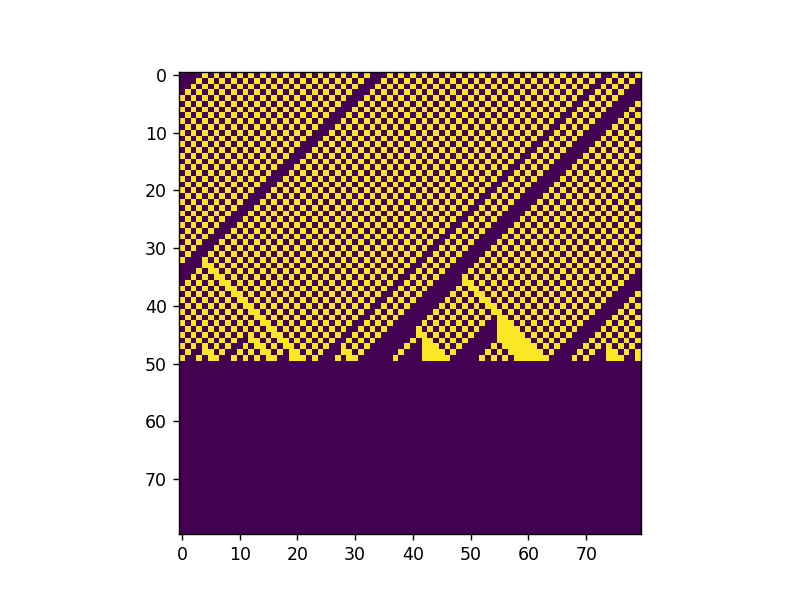

In [101]:
history_184 = run_simulation_1d(n_cells, n_generations, 184, rng)
animation_184 = animate_simulation(history_184, framerate)
if save_file:
    animation_184.save('./gifs/1d-evolution-184.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


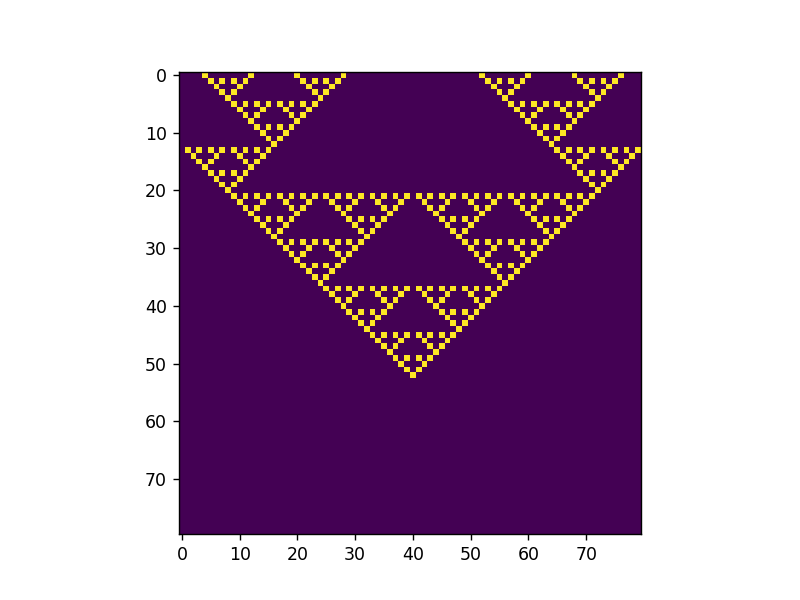

In [102]:
history_90 = run_simulation_1d(n_cells, n_generations, 90, rng)
animation_90 = animate_simulation(history_90, framerate)
if save_file:
    animation_90.save('./gifs/1d-evolution-90.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


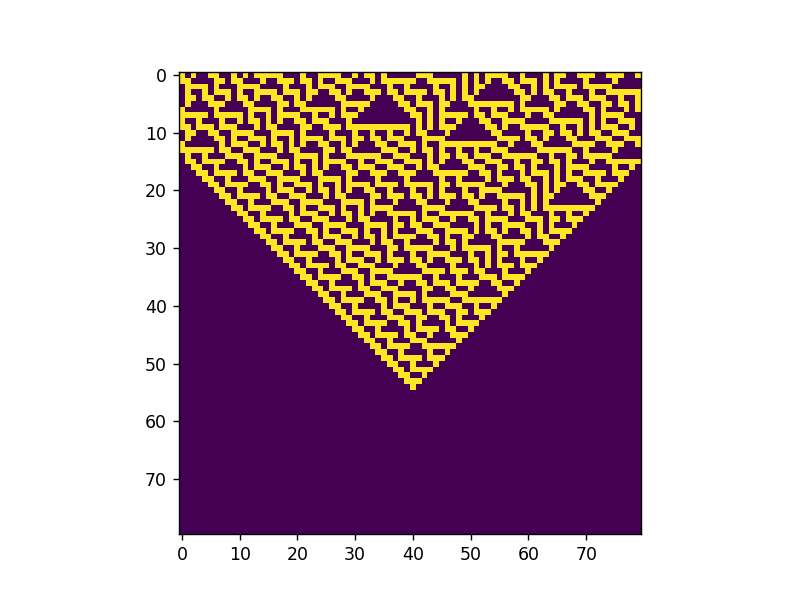

In [103]:
history_30 = run_simulation_1d(n_cells, n_generations, 30, rng)
animation_30 = animate_simulation(history_30, framerate)
if save_file:
    animation_30.save('./gifs/1d-evolution-30.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


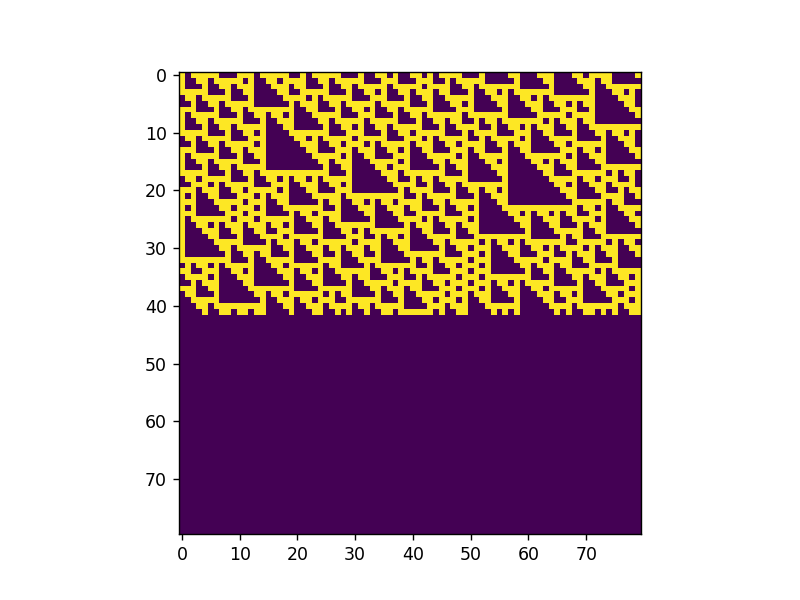

In [104]:
history_110 = run_simulation_1d(n_cells, n_generations, 110, rng)
animation_110 = animate_simulation(history_110, framerate)
if save_file:
    animation.save('./gifs/1d-evolution-110.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


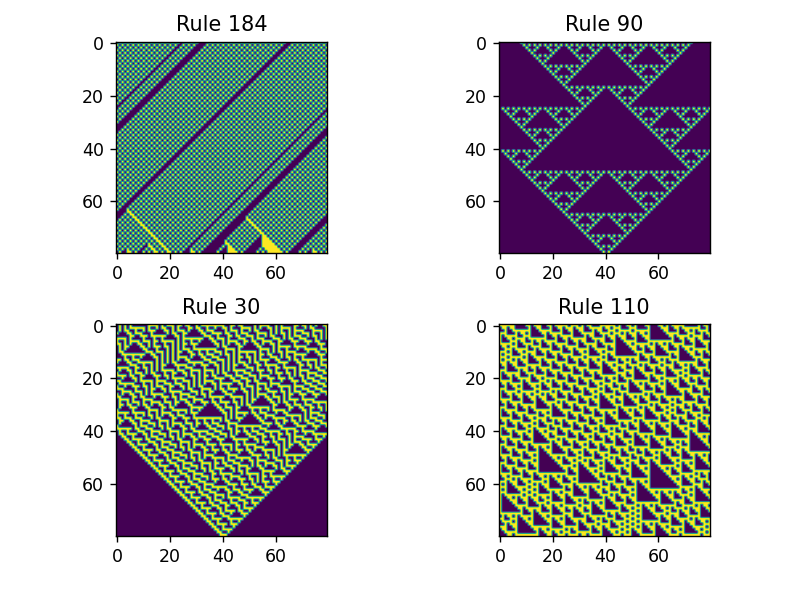

In [105]:
fig, axes = plt.subplots(2, 2)
histories = [history_184, history_90, history_30, history_110]
plt_names = ["Rule 184", "Rule 90", "Rule 30", "Rule 110"]
fig.tight_layout(pad=2)

for hist, ax, name in zip(histories, axes.flatten(), plt_names):
    ax.imshow(hist[-1])
    ax.set_title(name)
    

## Exercise 4.2

In [106]:
def create_grid(grid_size, rng):
    return rng.integers(0, 2, size=grid_size)


def get_nb_range(value, min, max, is_periodic_boundary):
    if value == min:
        if is_periodic_boundary:
            return max, min, min+1
        else:
            return min, min+1
        
    elif value == max:
        if is_periodic_boundary:
            return max-1, max, min
        else:
            return max-1, max
    
    else:
        return value-1, value, value+1
    

def enough_nbs_to_live(value, n_nbs):
    return n_nbs == 3 or (n_nbs == 2 and value)


def count_nbs(grid, grid_size, is_periodic_boundary):
    h, w = grid_size
    counts = np.zeros(shape=grid_size, dtype='uint8')
    
    for y in range(h):
        for x in range(w):
            xs = get_nb_range(x, 0, w-1, is_periodic_boundary)
            ys = get_nb_range(y, 0, h-1, is_periodic_boundary)
            nbgrid = np.ix_(ys, xs)

            value = grid[y, x]
            nbhood = grid[nbgrid]
            n_nbs = np.sum(nbhood) - value
            
            counts[y, x] = n_nbs
            
    return counts
            
            
def calculate_new_gen(grid, counts):
    return ((counts==3) | ((counts==2) & (grid==1))).astype('uint8')


def update_grid(grid, grid_size, is_periodic_boundary):
    counts = count_nbs(grid, grid_size, is_periodic_boundary)
    new_gen = calculate_new_gen(grid, counts)
    return new_gen


def run_simulation(initial_grid, n_generations, is_periodic_boundary):
    grid_size = initial_grid.shape
    grid = initial_grid
    history = [grid]
    
    for gen in range(1, n_generations):
        grid = update_grid(grid, grid_size, is_periodic_boundary)
        history.append(grid)
        
    return history

<IPython.core.display.Javascript object>


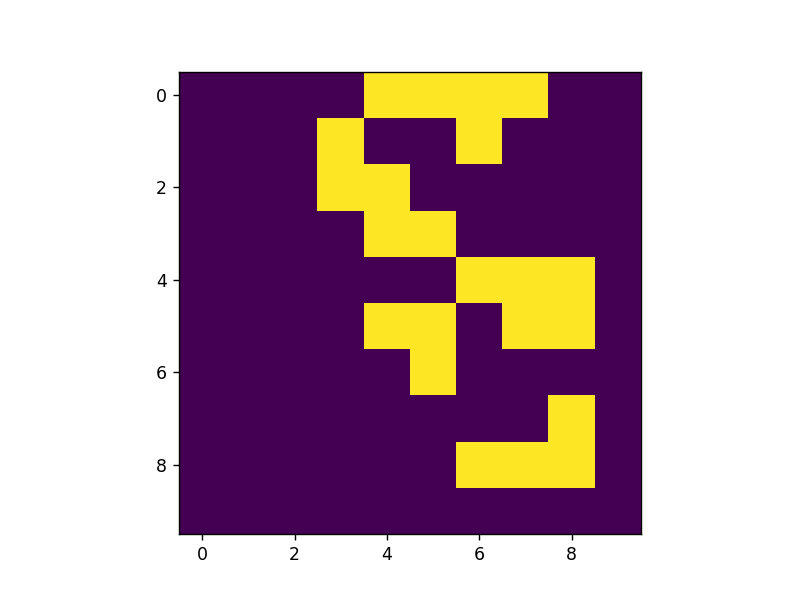

In [107]:
rng = np.random.default_rng()
grid_size = 10, 10
n_generations = 20
initial_grid = create_grid(grid_size, rng)
framerate = 2
save_file=True

history_nonperiod = run_simulation(initial_grid, n_generations, False)
animation_nonperiod = animate_simulation(history_nonperiod, framerate)
if save_file:
    animation_nonperiod.save('./gifs/2d-evolution-nonperiodic.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


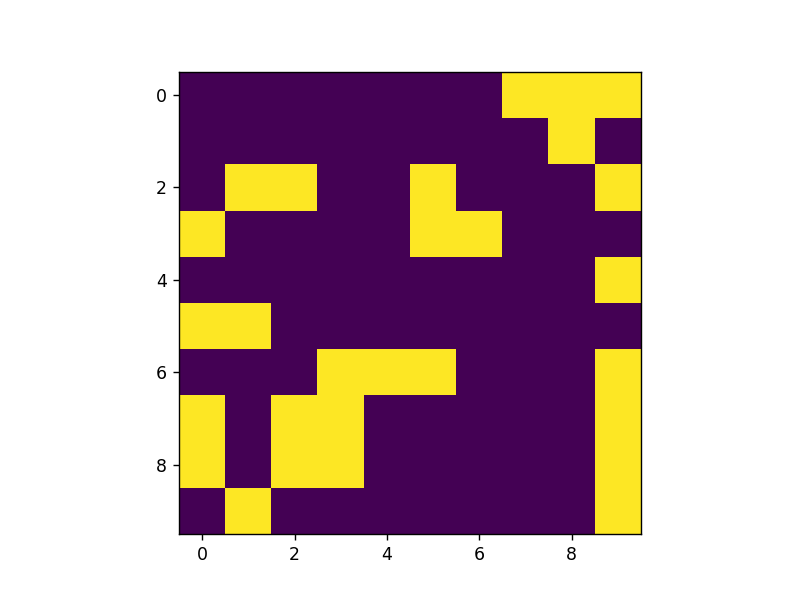

In [108]:
history_period = run_simulation(initial_grid, n_generations, True)
animation_period = animate_simulation(history_period, framerate)
if save_file:
    animation_period.save('./gifs/2d-evolution-periodic.gif', writer=gif_writer)

## Exercise 4.3

In [109]:
framerate = 20
save_file = True

<IPython.core.display.Javascript object>


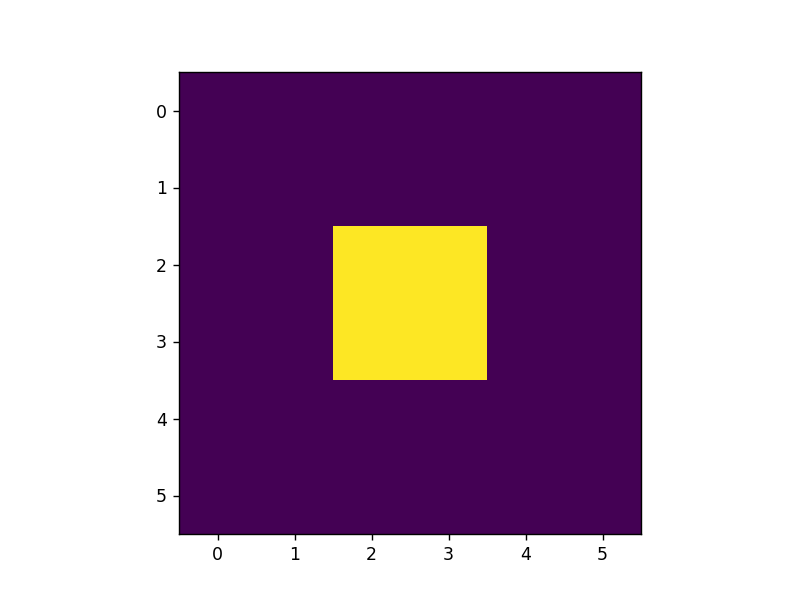

In [110]:
def simulate_block():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)
    
history_block = simulate_block()
animation_block = animate_simulation(history_block, framerate)
if save_file:
    animation_block.save('./gifs/animation_block.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


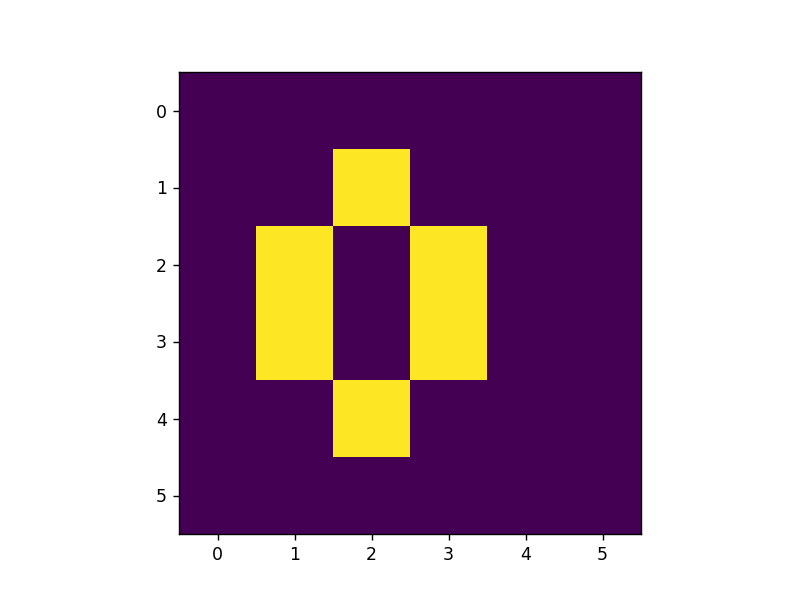

In [111]:
def simulate_beehive():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)
    
history_beehive = simulate_beehive()
animation_beehive = animate_simulation(history_beehive, framerate)
if save_file:
    animation_beehive.save('./gifs/animation_beehive.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


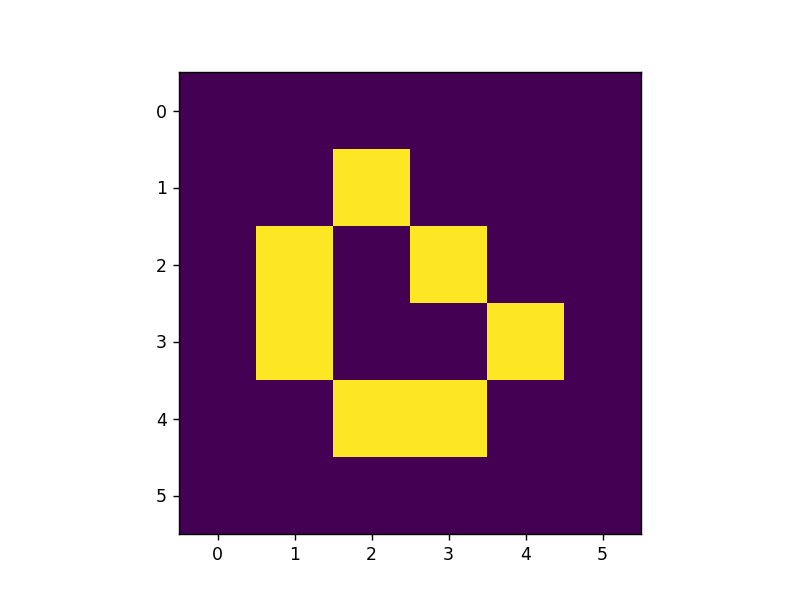

In [112]:
def simulate_loaf():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)
    
history_loaf = simulate_loaf()
animation_loaf = animate_simulation(history_loaf, framerate)
if save_file:
    animation_loaf.save('./gifs/animation_loaf.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


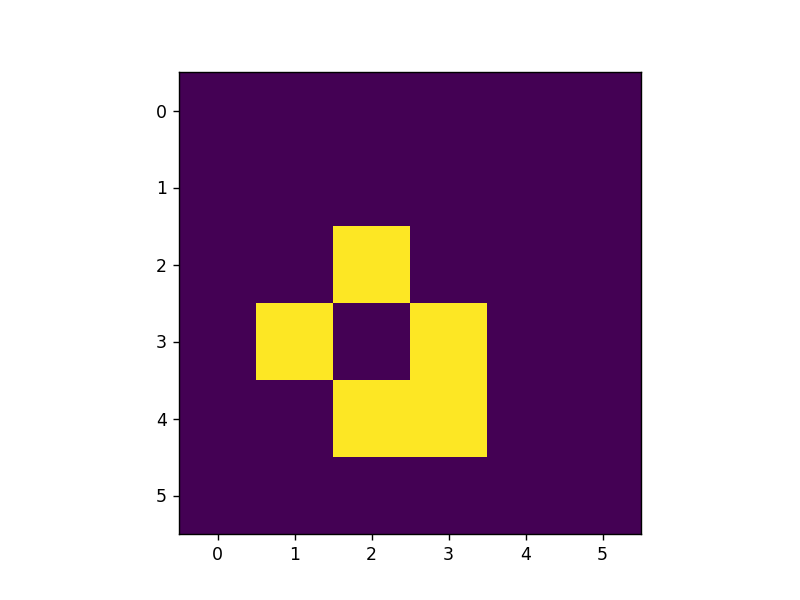

In [113]:
def simulate_boat():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)
    
history_boat = simulate_boat()
animation_boat = animate_simulation(history_boat, framerate)
if save_file:
    animation_boat.save('./gifs/animation_boat.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


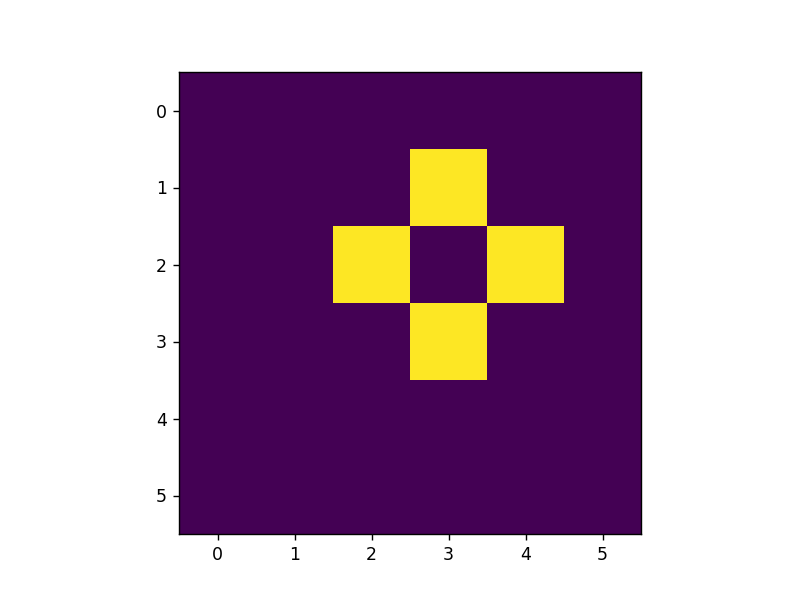

In [114]:
def simulate_tub():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 2, False)
    
history_tub = simulate_tub()
animation_tub = animate_simulation(history_tub, framerate)
if save_file:
    animation_tub.save('./gifs/animation_tub.gif', writer=gif_writer)

## Exercise 4.4

<IPython.core.display.Javascript object>


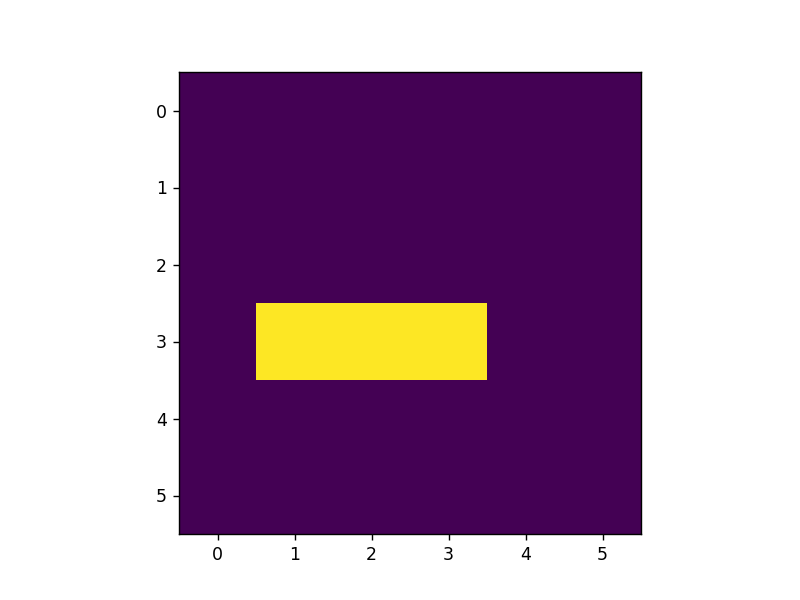

In [115]:
def simulate_blinker():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 4, False)
    
history_blinker = simulate_blinker()
animation_blinker = animate_simulation(history_blinker, framerate)
if save_file:
    animation_blinker.save('./gifs/animation_blinker.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


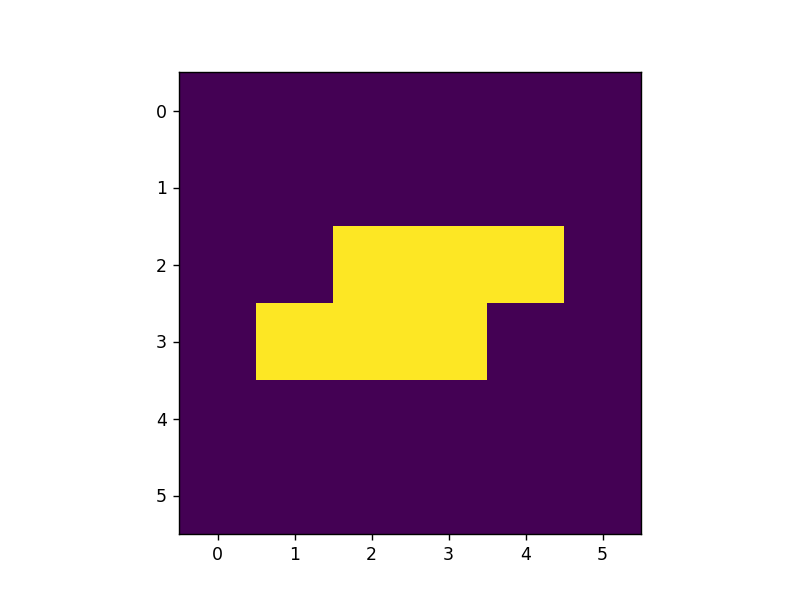

In [116]:
def simulate_toad():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0],
        [0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 4, False)
    
history_toad = simulate_toad()
animation_toad = animate_simulation(history_toad, framerate)
if save_file:
    animation_toad.save('./gifs/animation_toad.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


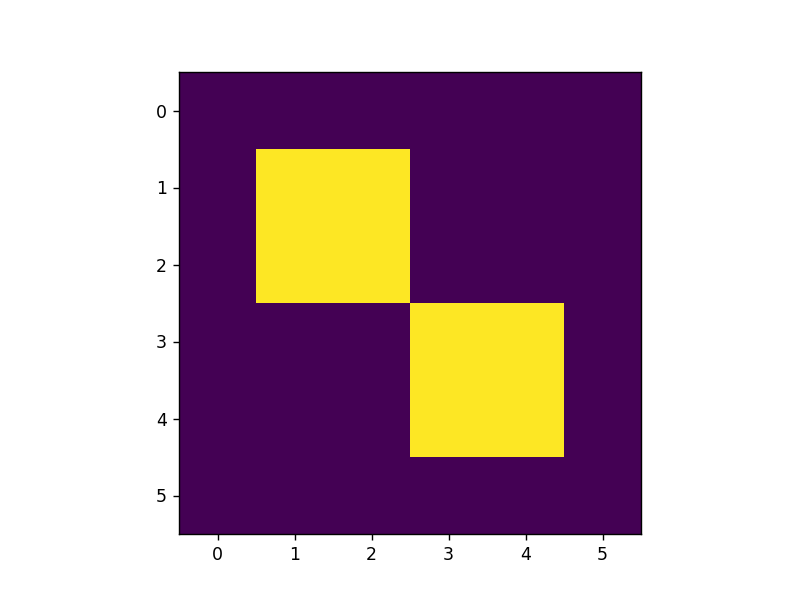

In [117]:
def simulate_beacon():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 4, False)
    
history_beacon = simulate_beacon()
animation_beacon = animate_simulation(history_beacon, framerate)
if save_file:
    animation_beacon.save('./gifs/animation_beacon.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


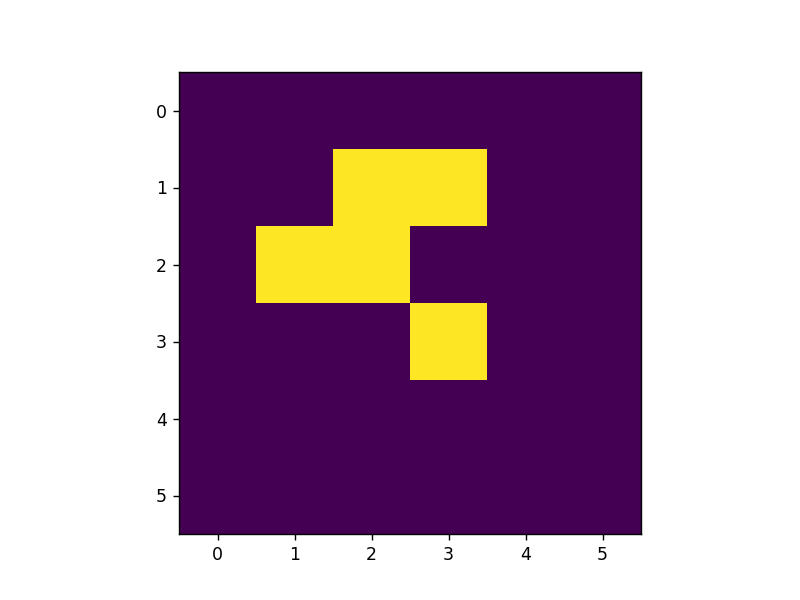

In [118]:
def simulate_glider_1():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 10, False)
    
history_glider_1 = simulate_glider_1()
animation_glider_1 = animate_simulation(history_glider_1, framerate)
if save_file:
    animation_glider_1.save('./gifs/animation_glider_1.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


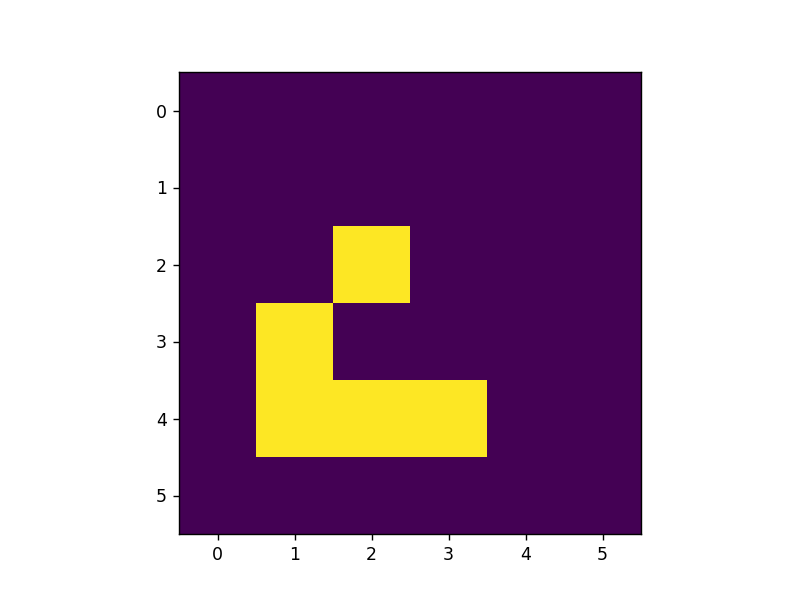

In [119]:
def simulate_glider_2():
    grid = np.array([
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 10, False)
    
history_glider_2 = simulate_glider_2()
animation_glider_2 = animate_simulation(history_glider_2, framerate)
if save_file:
    animation_glider_2.save('./gifs/animation_glider_2.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


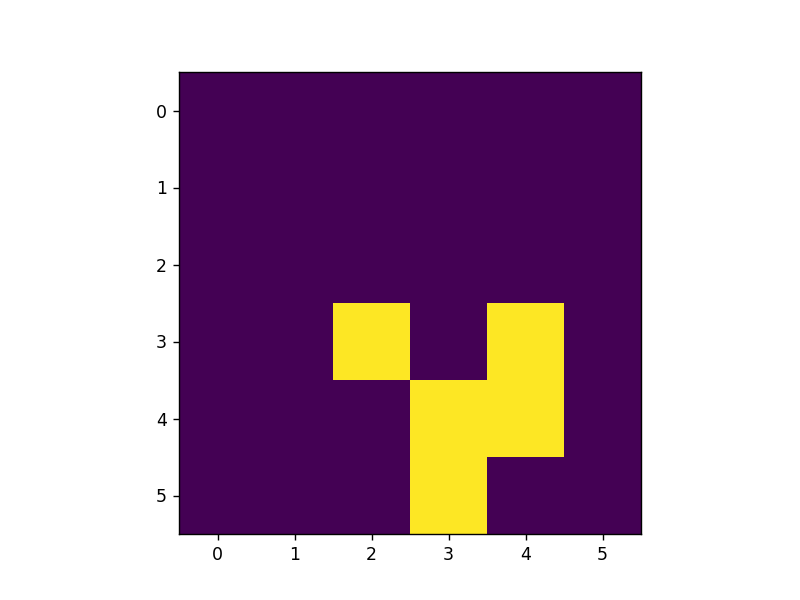

In [120]:
def simulate_glider_3():
    grid = np.array([
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 10, False)
    
history_glider_3 = simulate_glider_3()
animation_glider_3 = animate_simulation(history_glider_3, framerate)
if save_file:
    animation_glider_3.save('./gifs/animation_glider_3.gif', writer=gif_writer)

<IPython.core.display.Javascript object>


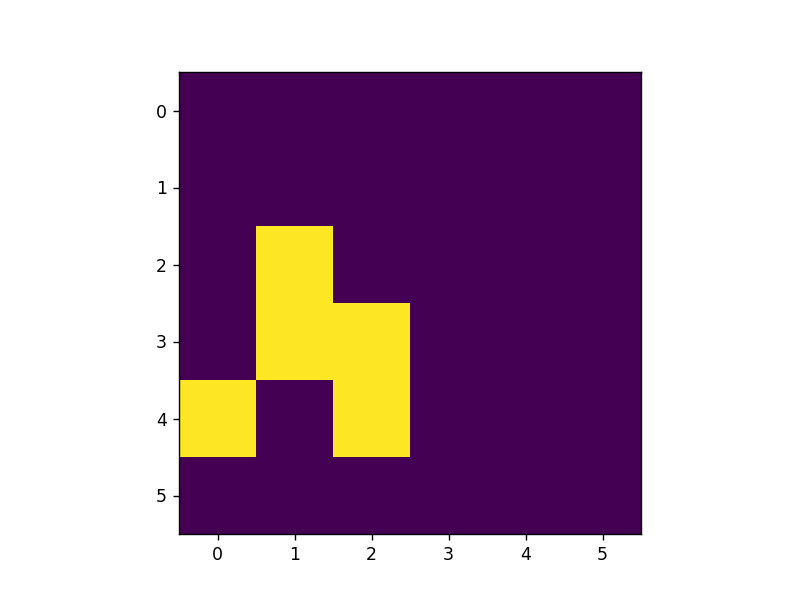

In [121]:
def simulate_glider_4():
    grid = np.array([
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
    ], dtype='uint8')
    
    return run_simulation(grid, 10, False)
    
history_glider_4 = simulate_glider_4()
animation_glider_4 = animate_simulation(history_glider_4, framerate)
if save_file:
    animation_glider_4.save('./gifs/animation_glider_4.gif', writer=gif_writer)